<a href="https://colab.research.google.com/github/Myth524/Handling-Null-Values/blob/main/TallerNulos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

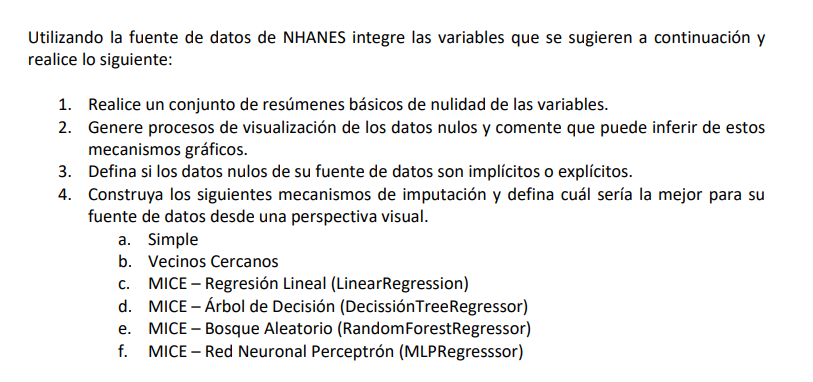


# **1. Componentes necesarios**

## **1.1 Extensiones**

In [ ]:
!pip install nhanes
!pip install pkg_resources
!pip install pyjanitor
!pip install missingno
!pip install session_info
!pip install UpSetPlot
!pip install pyreadr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.0 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement pkg_resources (from versions: none)
ERROR: No matching distribution found for pkg_resources
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.0/202.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.1 MB/s eta 0:00:00
  Created wheel for session_info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=020d7123188bbacacf73ca57c7a4cc63014fe9be7d2b3cc10cda4f7f692aad60
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session_info
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for UpSetPlot: filename=UpSetPlot-0.9.0-py3-none-any.whl size=24817 sha256=c4a01c5f58284b73866aef5609e1a7161c90c3c8b83

## **1.2. Importacion de librarias**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%run '/content/drive/MyDrive/Universidad/Ingenieria de Datos/pandas-missing-extension.ipynb'

In [ ]:
# Manejo de Datos
import pandas as pd
import janitor
import nhanes.load
import pyreadr

# Análisis Estadístico
import statsmodels.api as sm
import statsmodels.datasets
import scipy.stats

# Visualización de Datos
import matplotlib.pyplot as plt
import seaborn as sb
import missingno
import statsmodels.graphics
import statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Machine Learning
import sklearn.compose
import sklearn.impute
import sklearn.preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import set_config

# Utilidades
import numpy as np
import session_info
import warnings
warnings.filterwarnings('ignore')

# **2. Cargar datos**

In [ ]:
# se cargan los datos del csv
data = pd.read_csv('/content/drive/MyDrive/Universidad/Ingenieria de Datos/nahes_data.csv')
data.head()

,SEQN,general_health_condition,ever_breastfed_or_fed_breastmilk,age_stopped_breastfeedingdays,age_first_fed_formuladays,age_stopped_receiving_formuladays,age_started_other_foodbeverage,age_first_fed_milkdays,type_of_milk_first_fed_whole_milk,type_of_milk_first_fed2_milk,...,days_smoked_cigs_during_past30_days,avg_cigarettesday_during_past30_days,tried_to_quit_smoking,times_stopped_smoking_cigarettes,how_long_were_you_able_to_stop_smoking,unit_of_measure_dayweekmonthyear_2_smq,current_selfreported_height_inches,current_selfreported_weight_pounds,tried_to_lose_weight_in_past_year,times_lost10_lbs_or_more_to_lose_weight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **3.1. Filtrado de variables**
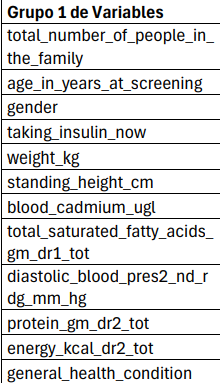


In [ ]:
filter_data = [
    'total_number_of_people_in_the_family',
    'age_in_years_at_screening',
    'gender',
    'taking_insulin_now',
    'weight_kg',
    'standing_height_cm',
    'blood_cadmium_ugl',
    'total_saturated_fatty_acids_gm_dr1_tot',
    'diastolic_blood_pres2_nd_rdg_mm_hg',
    'protein_gm_dr2_tot',
    'energy_kcal_dr2_tot',
    'general_health_condition'
]

data_mod = data[filter_data]
data_mod.head()

,total_number_of_people_in_the_family,age_in_years_at_screening,gender,taking_insulin_now,weight_kg,standing_height_cm,blood_cadmium_ugl,total_saturated_fatty_acids_gm_dr1_tot,diastolic_blood_pres2_nd_rdg_mm_hg,protein_gm_dr2_tot,energy_kcal_dr2_tot,general_health_condition
0,5,2.0,Female,0.0,13.7,88.6,NaN,NaN,NaN,NaN,NaN,NaN
1,4,2.0,Male,0.0,13.9,94.2,0.07,11.372,NaN,30.49,1356.0,NaN
2,1,66.0,Female,0.0,79.5,158.3,0.24,16.435,NaN,38.52,1235.0,Good
3,5,18.0,Male,0.0,66.3,175.7,0.21,35.169,70.0,NaN,NaN,Very good
4,7 or more people in the Family,13.0,Male,0.0,45.4,158.4,0.14,33.252,46.0,92.03,1794.0,Good


# **3. Resumen basico**

## **3.1. Tamaño general de los datos**

In [ ]:
data_mod.shape

(8366, 12)

## **3.2. Numero de registros completo**

In [ ]:
data_mod.missing.number_complete()

89692

## **3.3. Numero de registros nulos**

In [ ]:
data_mod.missing.number_missing()

10700

## **3.4. Resumen por variable**

In [ ]:
data_mod.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,total_number_of_people_in_the_family,0,8366,0.000000
1,age_in_years_at_screening,0,8366,0.000000
2,gender,0,8366,0.000000
3,taking_insulin_now,1,8366,0.011953
4,weight_kg,124,8366,1.482190
5,standing_height_cm,350,8366,4.183600
6,blood_cadmium_ugl,853,8366,10.196032
7,total_saturated_fatty_acids_gm_dr1_tot,1081,8366,12.921348
8,diastolic_blood_pres2_nd_rdg_mm_hg,1803,8366,21.551518
9,protein_gm_dr2_tot,2043,8366,24.420273


## **3.5. Cantidad de registros con respecto a la cantidad de variables nulas**

In [ ]:
data_mod.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,42.857143
1,1,2,14.285714
2,2,1,7.142857
3,3,2,14.285714
4,4,0,0.000000
...,...,...,...
8361,8361,0,0.000000
8362,8362,2,14.285714
8363,8363,0,0.000000
8364,8364,0,0.000000


# **4. Visualizacion de los datos nulos**

## **4.1 Relacion de variables a partir del impacto de registros nulos**

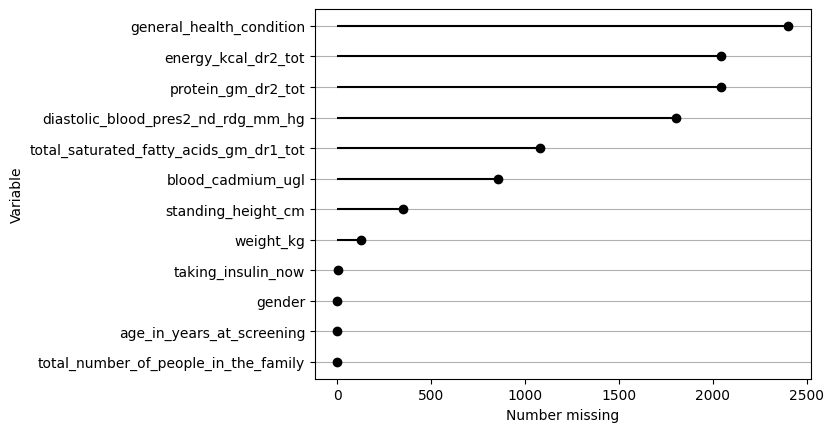

In [ ]:
data_mod.missing.missing_variable_plot()

Se destaca que la columna general_health_condition es la que presenta la mayor cantidad de datos nulos, con aproximadamente 2400 registros faltantes.

## **4.2. Grafico de barras de datos nulos**

<Axes: >

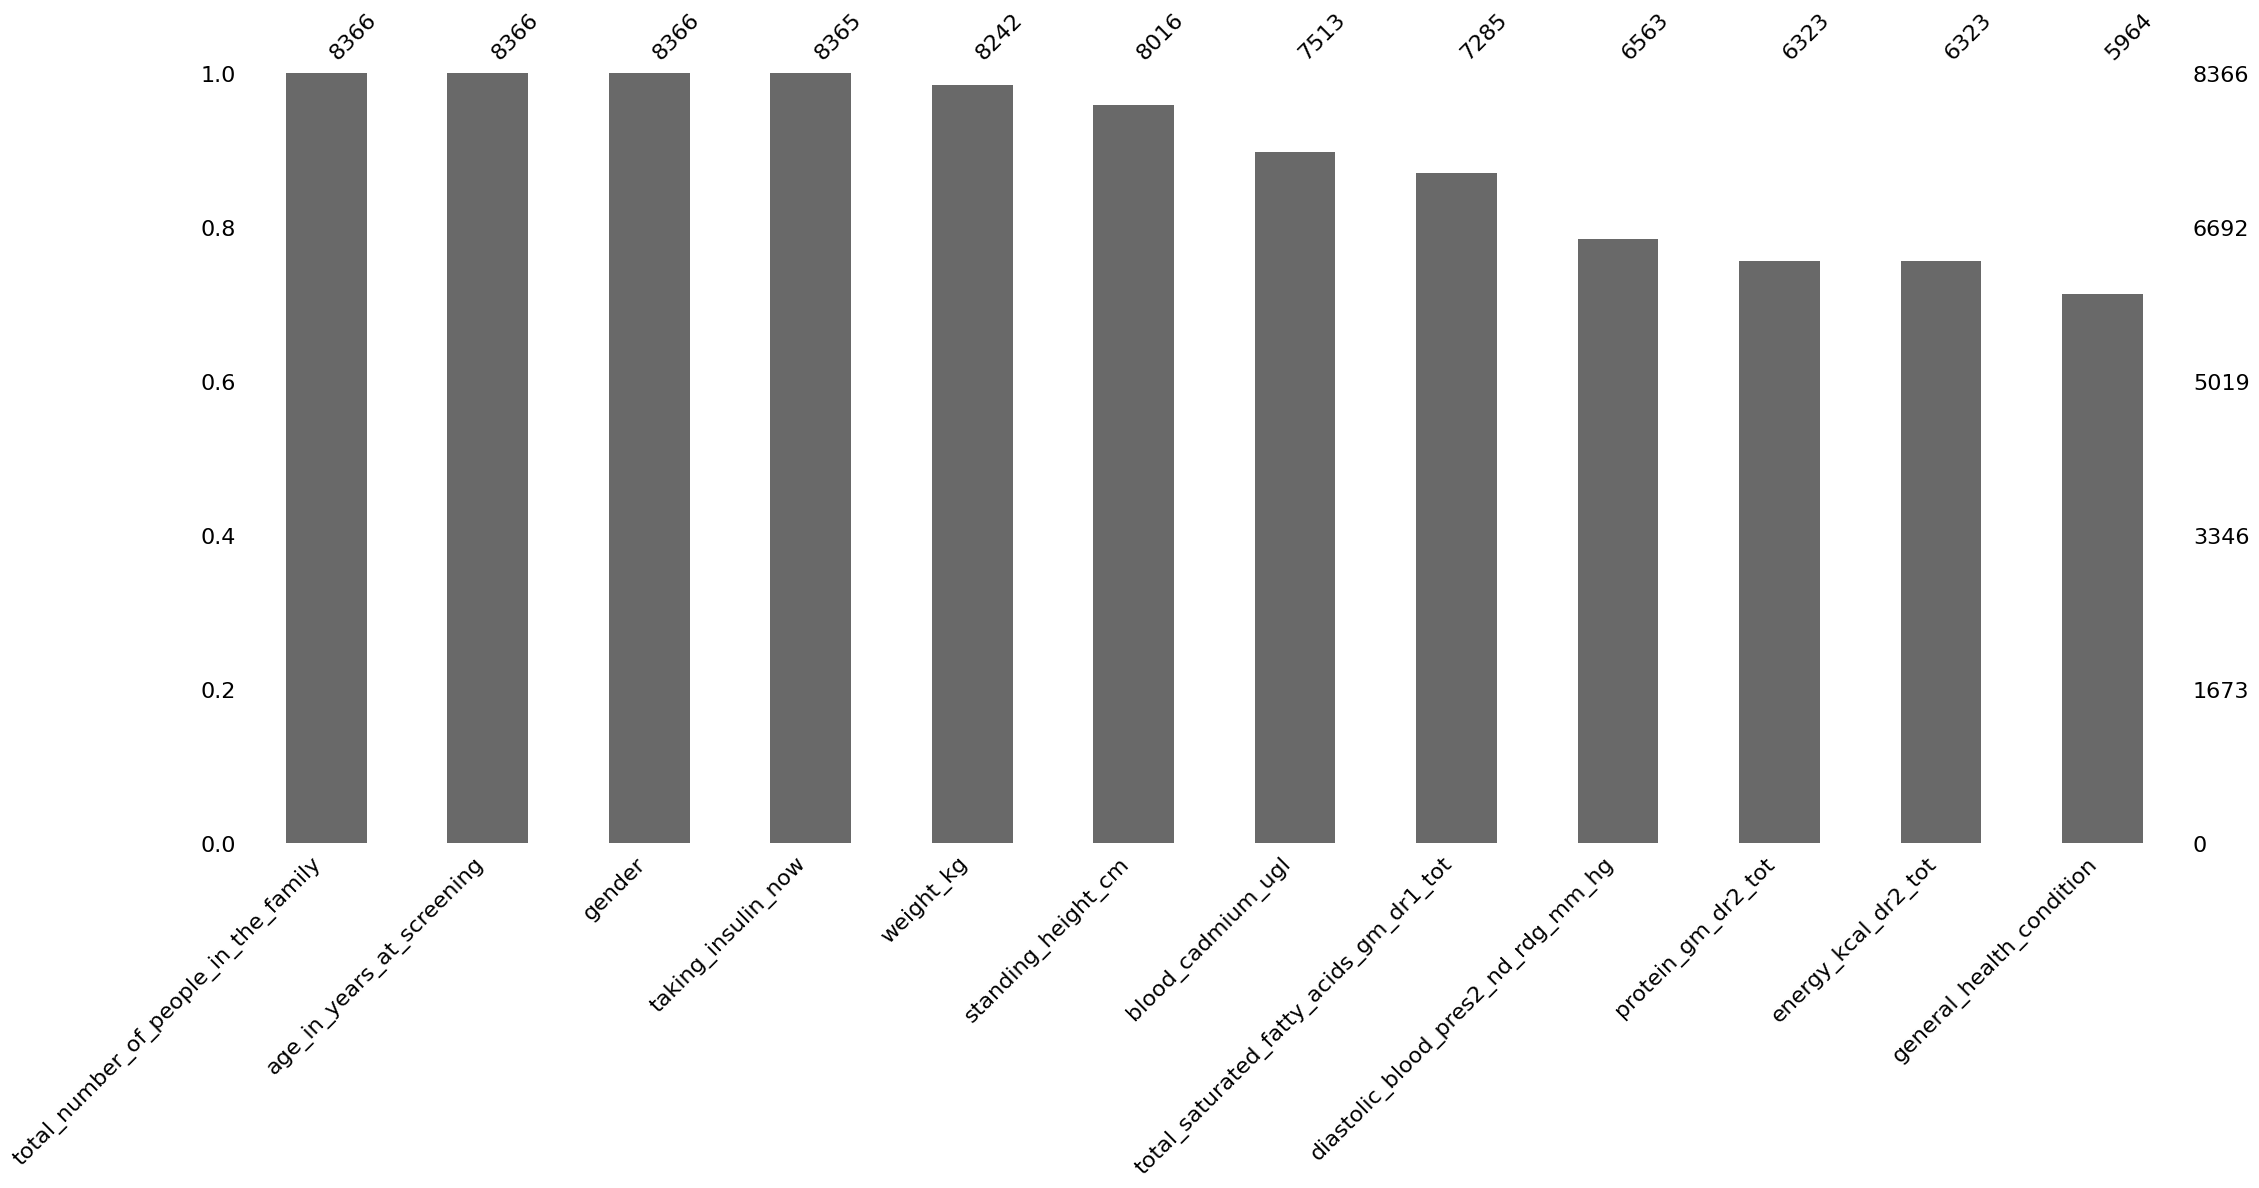

In [ ]:
missingno.bar(df = data_mod)


Se observa lo mismo que en el gráfico anterior, pero considerando la cantidad de registros no nulos en función del total de datos del conjunto.

## **4.3 Matriz de datos nulos**

<Axes: >

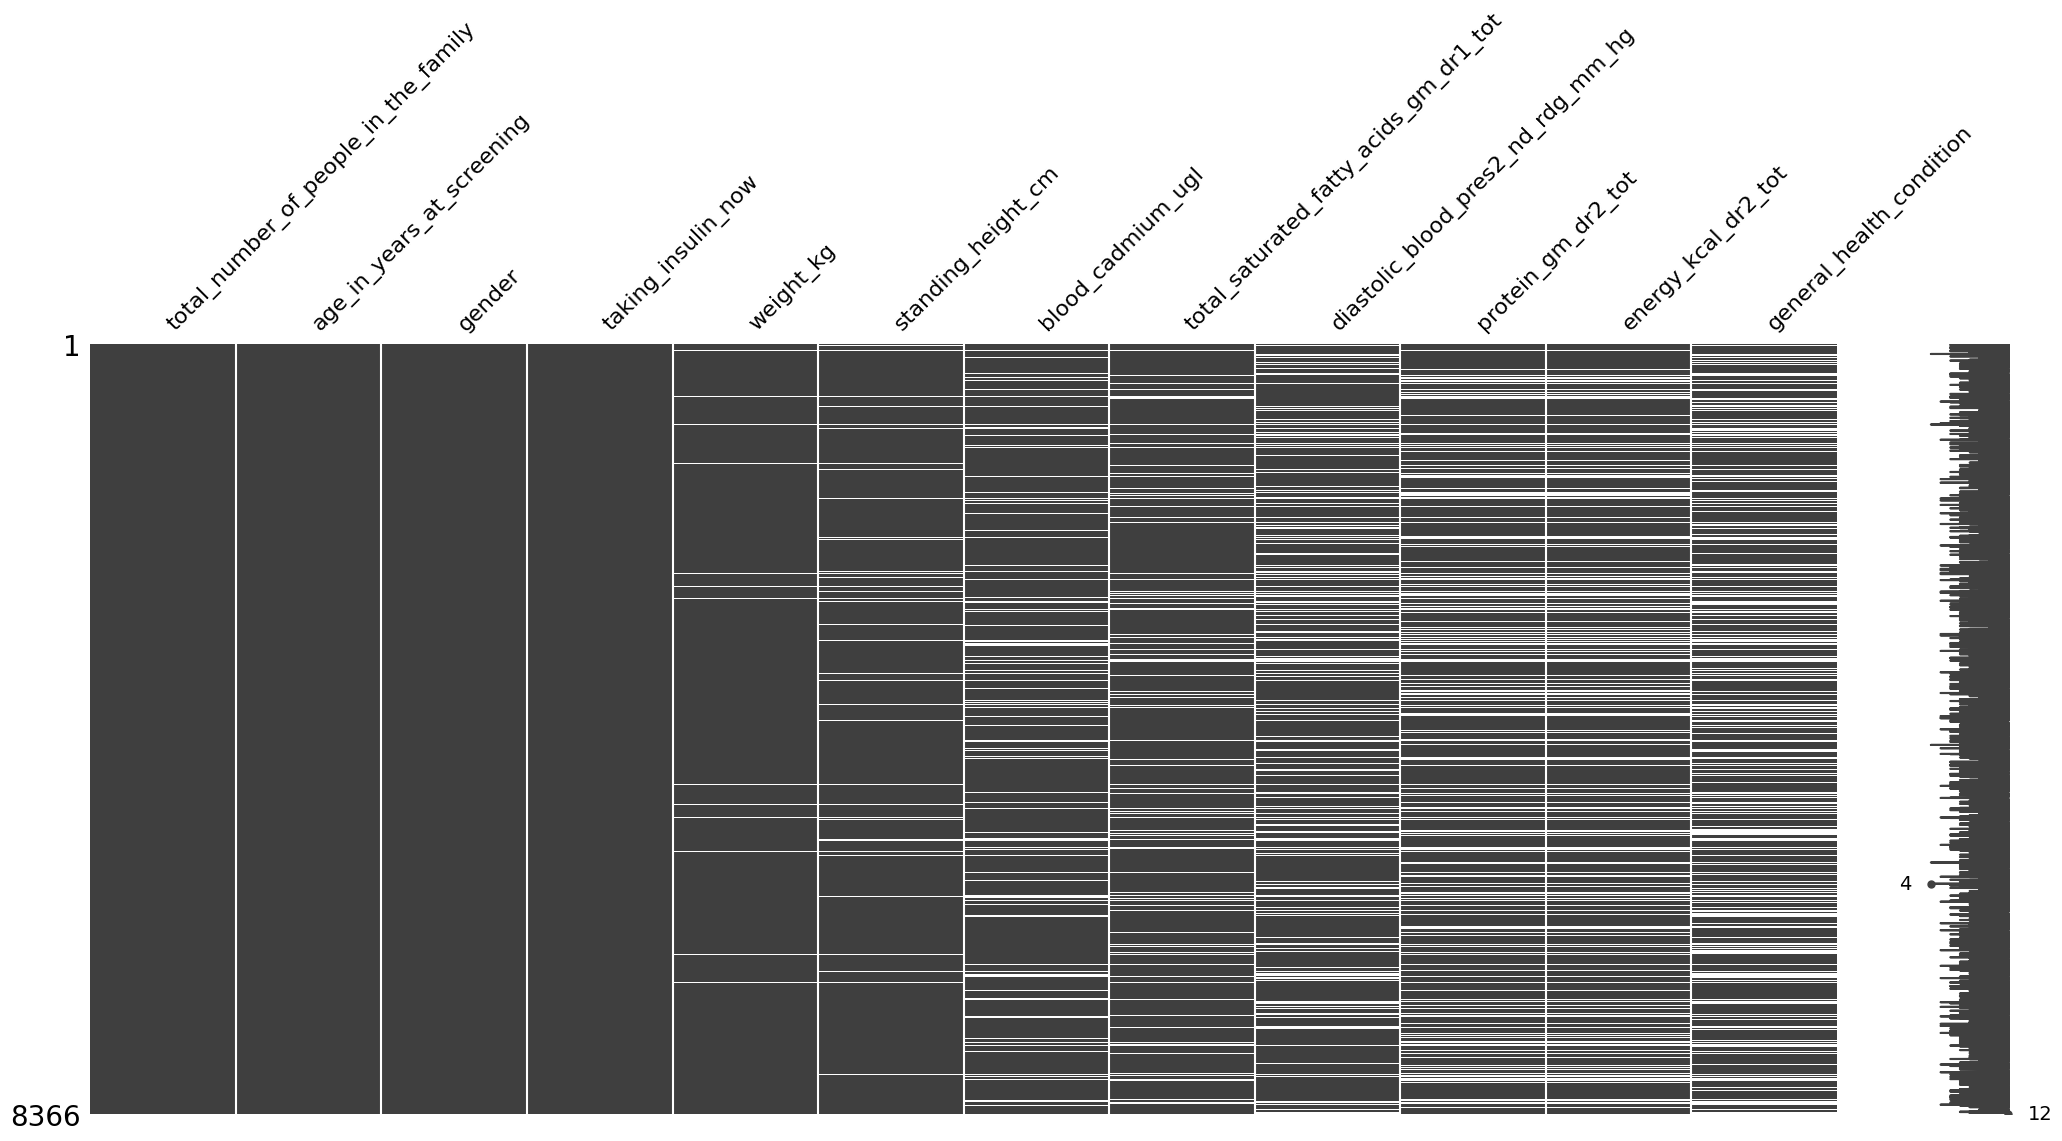

In [ ]:
missingno.matrix(df = data_mod)

Las variables energy_kcal_dr2_tot y protein_gm_dr2_tot presentan un patrón en la forma en que estos datos están ausentes: cuando faltan datos en una de estas variables, que también falten en la otra.

## **4.3.1 Matriz de datos nulos ordenada segun el numero de nulos**

<Axes: >

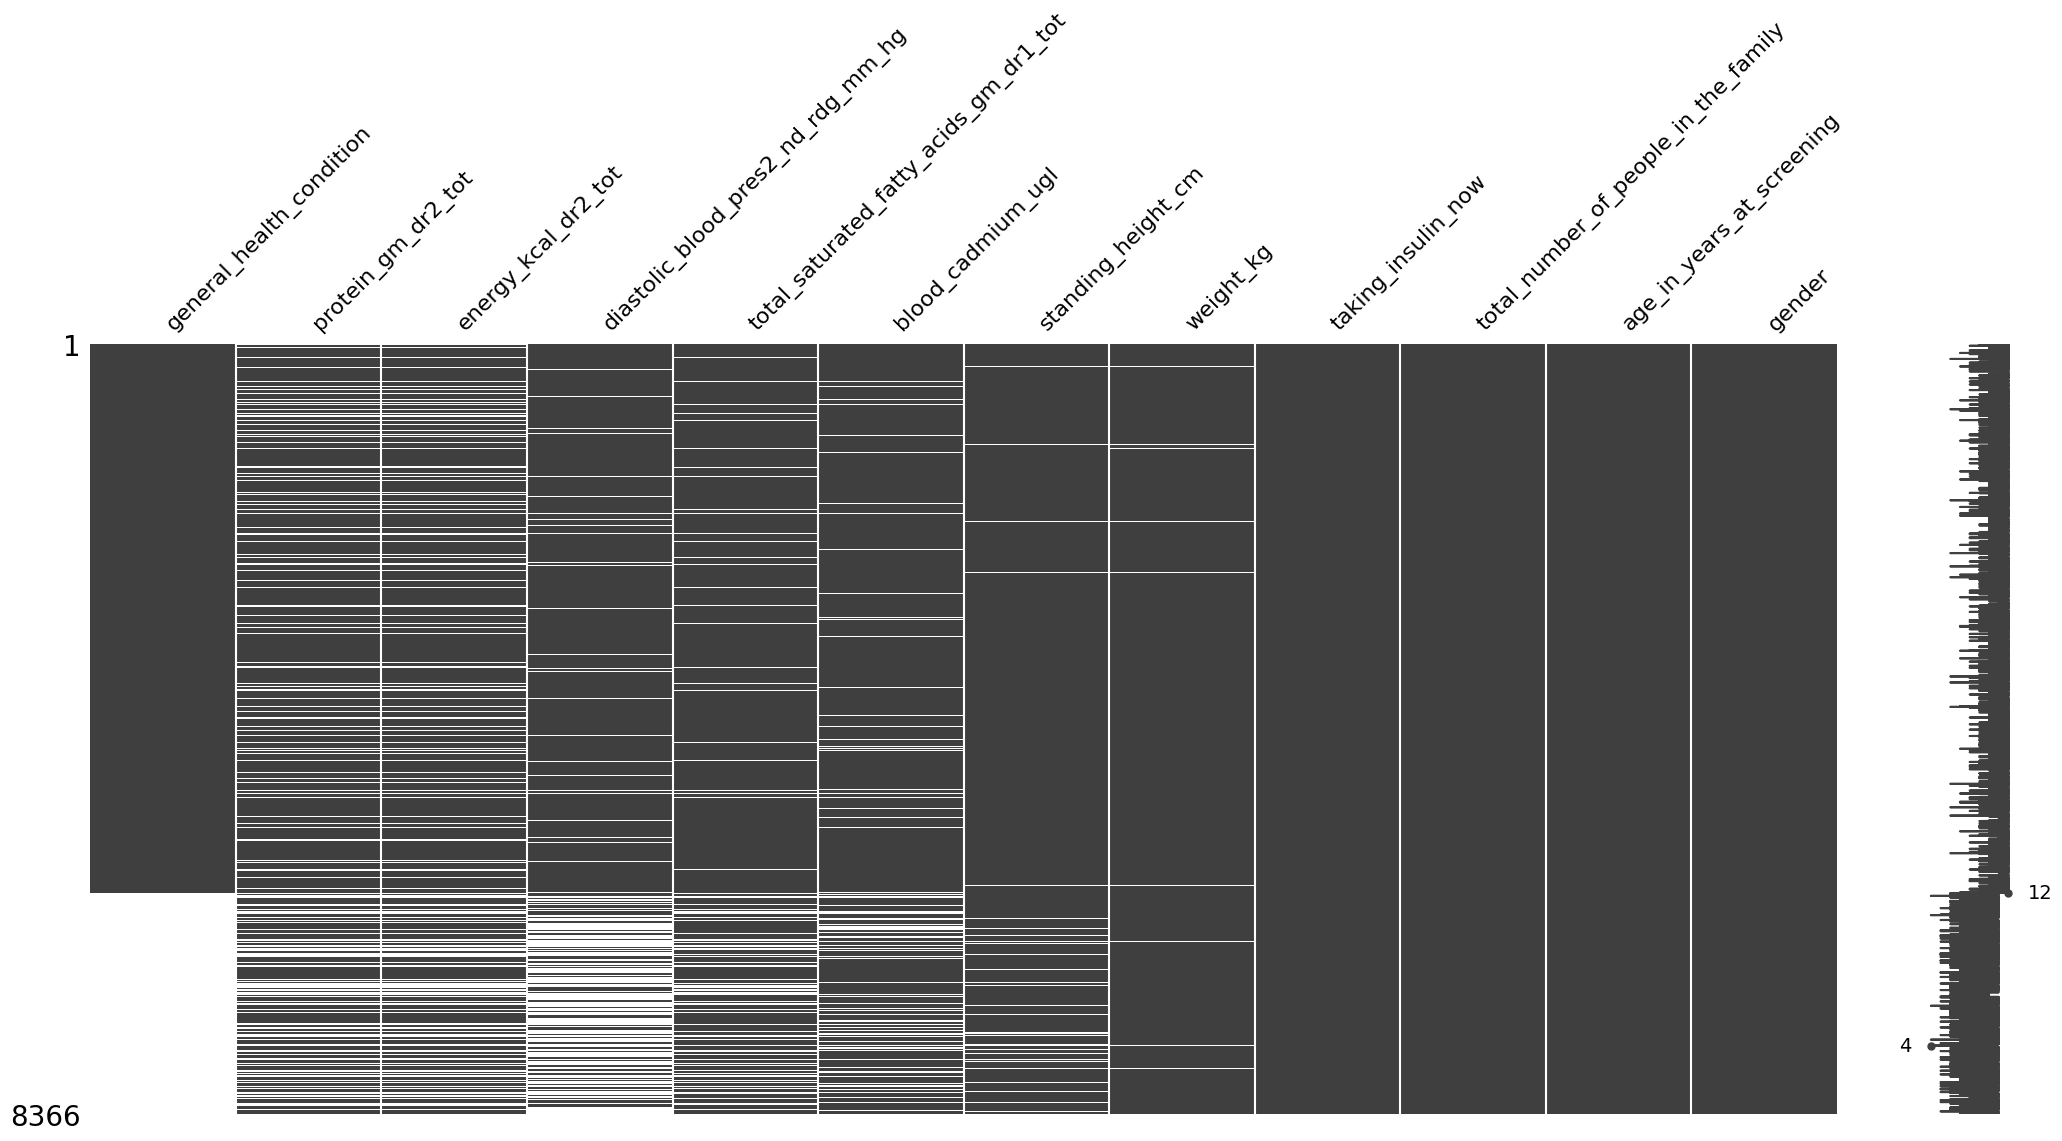

In [ ]:
data_mod.missing.sort_variables_by_missingness().sort_values(by = 'general_health_condition').pipe(missingno.matrix)

Se observa un posible patrón de valores faltantes entre general_health_condition y diastolic_blood_pres_2nd_rdg_mm_hg.

## **4.4 Intersección de valores nulos entre diferentes columnas**

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

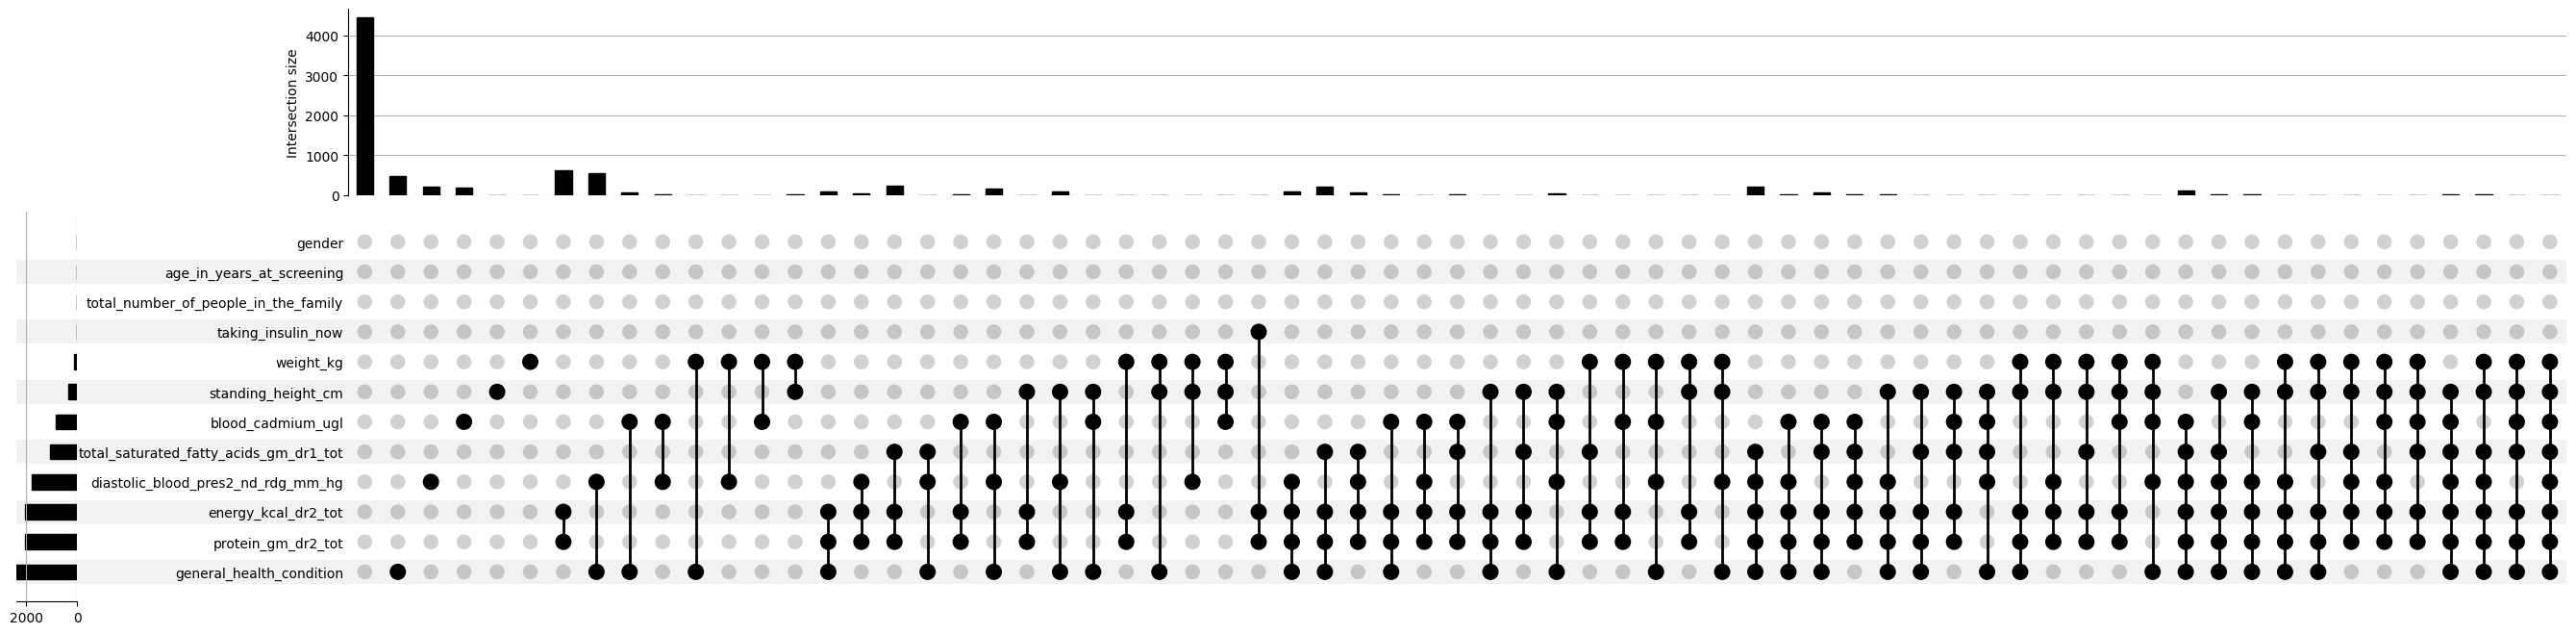

In [ ]:
data_mod.missing.missing_upsetplot(variables = None)

Se observa la presencia de patrones entre las variables previamente mencionada.

## **4.5 Mapa de correlaciones de varaibles nulas**

<Axes: >

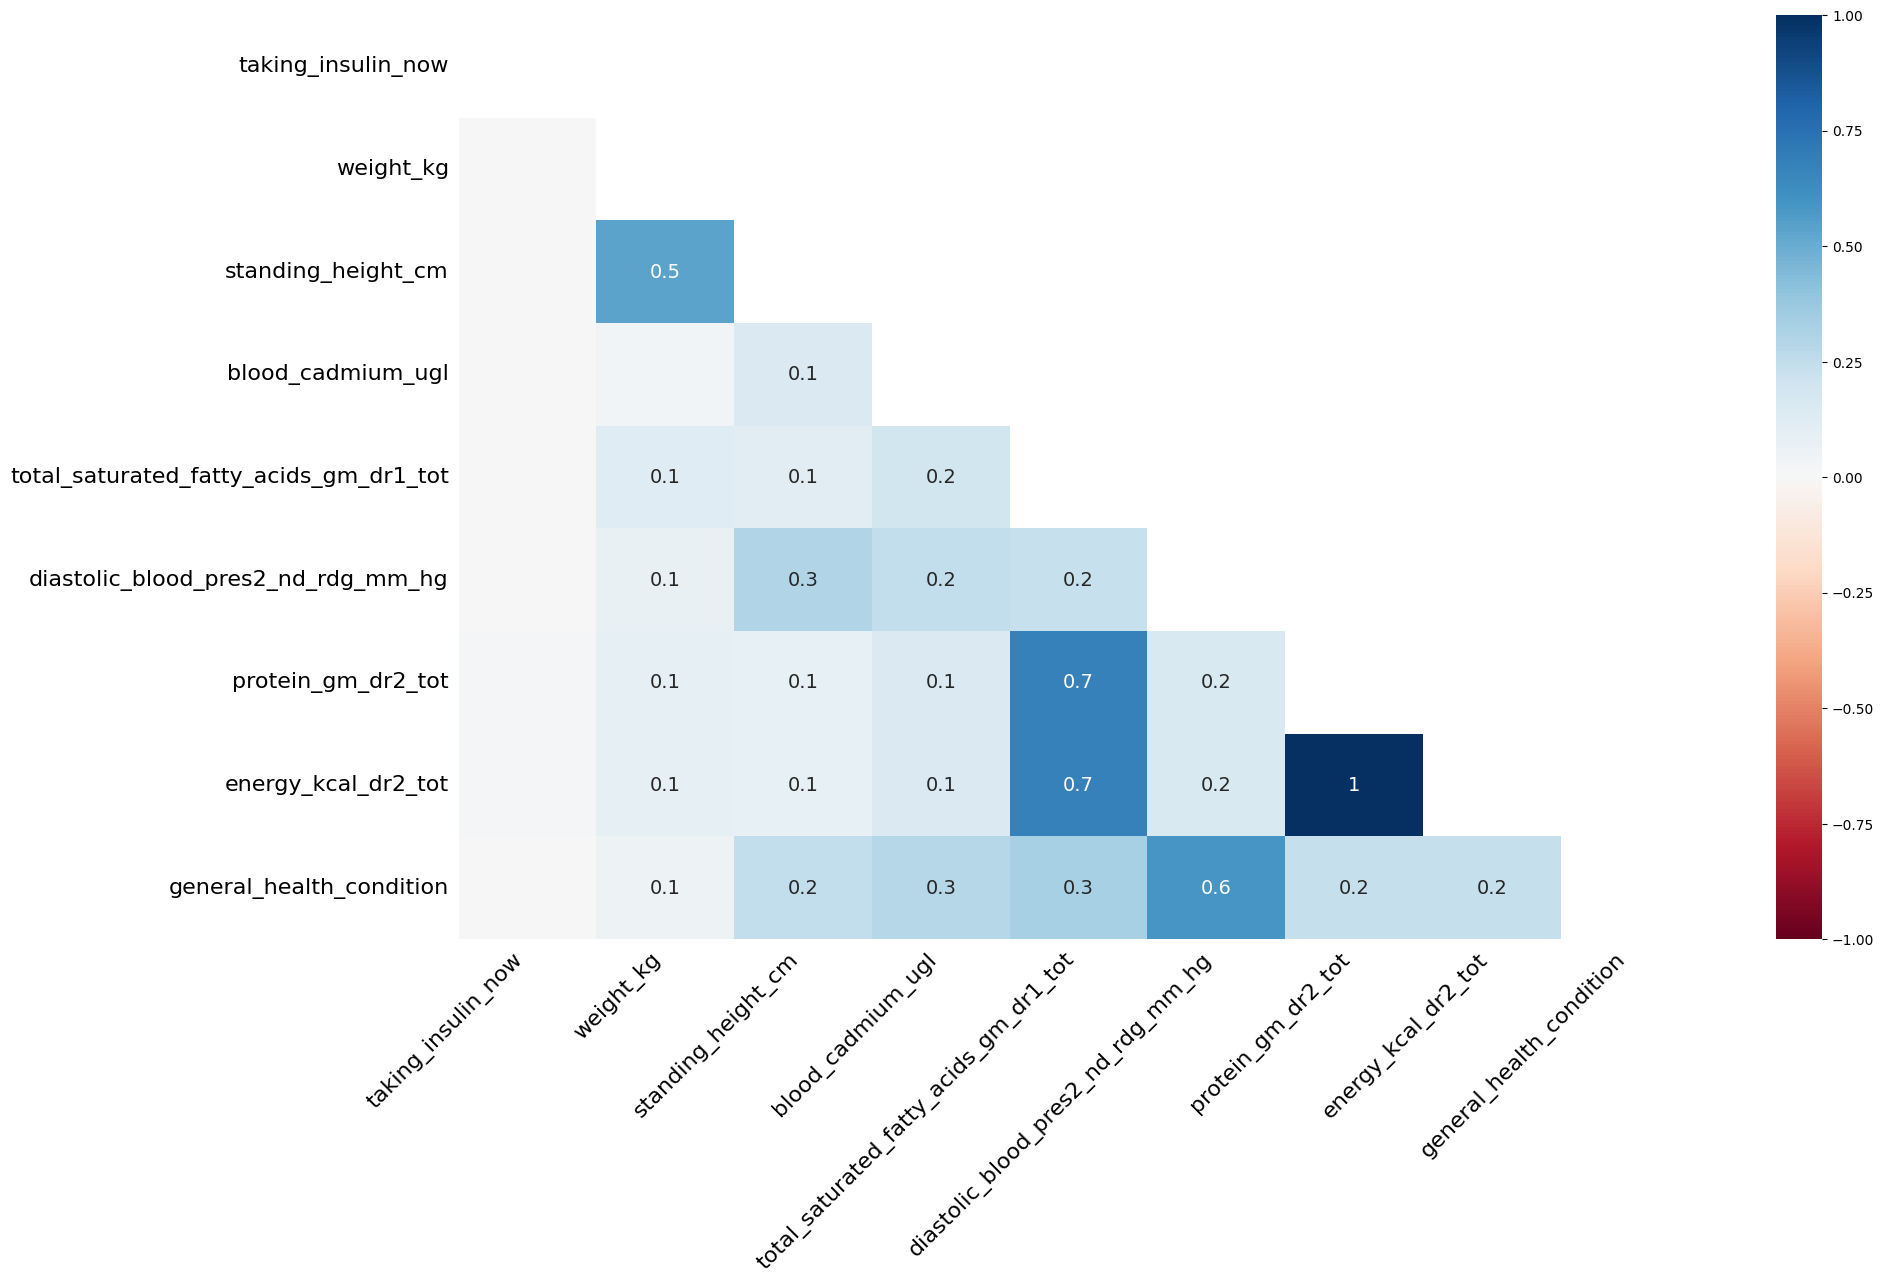

In [ ]:
missingno.heatmap(df = data_mod)

- Se identifica una correlación directa moderada de 0.6 entre general_health_condition y diastolic_blood_pres2_nd_rdg_mm_hg.
- Se observa una correlación directa moderada de 0.7 entre total_saturated_fatty_acids_gm_dr1_tot y energy_kcal_dr2_tot.
- Se encuentra una correlación directa moderada de 0.7 entre total_saturated_fatty_acids_gm_dr1_tot y protein_gm_dr2_tot.
- Se detecta una correlación fuerte y directa de 1 entre protein_gm_dr2_tot y energy_kcal_dr2_tot.
- Se aprecia una correlacion modera entre weight_kg y standing_height_cm de 0.5.

## **4.6. Analisis general**

- La variable general_health_condition tiene la mayor cantidad de datos faltantes con aproximadamente 2400 registros.

- Se observa un patrón consistente en los datos faltantes: la ausencia de datos en energy_kcal_dr2_tot suele coincidir con la ausencia en protein_gm_dr2_tot, y hay un patrón similar entre general_health_condition y diastolic_blood_pres_2nd_rdg_mm_hg.

- Las correlaciones entre variables sugieren relaciones importantes:
  - La correlación perfecta (1) entre protein_gm_dr2_tot y energy_kcal_dr2_tot sugiere una dependencia directa entre estos dos datos.

  - Correlaciones moderadas (0.7) entre total_saturated_fatty_acids_gm_dr1_tot con energy_kcal_dr2_tot y protein_gm_dr2_tot indican que estas variables están relacionadas, aunque no de manera tan fuerte como la relación entre protein_gm_dr2_tot y energy_kcal_dr2_tot.
  
 - La correlación moderada (0.6) entre general_health_condition y diastolic_blood_pres_2nd_rdg_mm_hg sugiere que hay una relación significativa entre estos indicadores de salud.

  - La correlación moderada (0.5) entre weight_kg y standing_height_cm indica una relación esperada entre el peso y la altura, aunque no es muy fuerte.

# **5. Identificacion de tipo de datos nulos**

In [ ]:
data_mod.describe()

,age_in_years_at_screening,taking_insulin_now,weight_kg,standing_height_cm,blood_cadmium_ugl,total_saturated_fatty_acids_gm_dr1_tot,diastolic_blood_pres2_nd_rdg_mm_hg,protein_gm_dr2_tot,energy_kcal_dr2_tot
count,8366.000000,8365.000000,8242.000000,8016.000000,7513.000000,7.285000e+03,6.563000e+03,6.323000e+03,6.323000e+03
mean,35.830026,0.029528,67.499260,156.593401,0.373626,2.656619e+01,6.829834e+01,7.086650e+01,1.832227e+03
std,24.905061,0.169291,31.377152,22.257858,0.503434,1.706550e+01,1.616033e+01,3.842939e+01,8.862046e+02
min,1.000000,0.000000,8.300000,78.300000,0.070000,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
25%,12.000000,0.000000,48.700000,151.400000,0.120000,1.498900e+01,6.000000e+01,4.499500e+01,1.226500e+03
50%,33.000000,0.000000,69.200000,161.900000,0.220000,2.303700e+01,7.000000e+01,6.379000e+01,1.699000e+03
75%,59.000000,0.000000,86.500000,171.200000,0.420000,3.438100e+01,7.800000e+01,8.807500e+01,2.261500e+03
max,80.000000,1.000000,242.600000,197.700000,13.030000,1.958520e+02,1.360000e+02,3.455300e+02,1.124100e+04


## **5.1. Datos nulos implicitos:**
total_saturated_fatty_acids_gm_dr1_tot	diastolic_blood_pres2_nd_rdg_mm_hg	protein_gm_dr2_tot	energy_kcal_dr2_tot
Tienen valores minimos excesivamente bajos que no tienen sentido. En el contexto de una pesona viva o la naturaleza para esas variables 5.397605e-79 no tienen sentido.

# **6. Mecanismos de Imputacion**

## **6.1. Preparacion Datos**

### **6.1.1 Limpieza de nulos implicitos**

In [ ]:
data_mod.loc[data_mod['total_saturated_fatty_acids_gm_dr1_tot']<0.01,'total_saturated_fatty_acids_gm_dr1_tot']=np.nan
data_mod.loc[data_mod['diastolic_blood_pres2_nd_rdg_mm_hg']<0.30,'diastolic_blood_pres2_nd_rdg_mm_hg']=np.nan
data_mod.loc[data_mod['protein_gm_dr2_tot']<0.01,'protein_gm_dr2_tot']=np.nan
data_mod.loc[data_mod['energy_kcal_dr2_tot']<5,'energy_kcal_dr2_tot']=np.nan

data_mod.describe()

,age_in_years_at_screening,taking_insulin_now,weight_kg,standing_height_cm,blood_cadmium_ugl,total_saturated_fatty_acids_gm_dr1_tot,diastolic_blood_pres2_nd_rdg_mm_hg,protein_gm_dr2_tot,energy_kcal_dr2_tot
count,8366.000000,8365.000000,8242.000000,8016.000000,7513.000000,7280.000000,6439.000000,6320.000000,6321.000000
mean,35.830026,0.029528,67.499260,156.593401,0.373626,26.584440,69.613605,70.900144,1832.806518
std,24.905061,0.169291,31.377152,22.257858,0.503434,17.057148,13.214075,38.407472,885.745079
min,1.000000,0.000000,8.300000,78.300000,0.070000,0.029000,2.000000,0.120000,19.000000
25%,12.000000,0.000000,48.700000,151.400000,0.120000,15.002000,62.000000,45.000000,1227.000000
50%,33.000000,0.000000,69.200000,161.900000,0.220000,23.043500,70.000000,63.830000,1699.000000
75%,59.000000,0.000000,86.500000,171.200000,0.420000,34.393750,78.000000,88.100000,2262.000000
max,80.000000,1.000000,242.600000,197.700000,13.030000,195.852000,136.000000,345.530000,11241.000000


In [ ]:
data_mod.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,total_number_of_people_in_the_family,0,8366,0.000000
1,age_in_years_at_screening,0,8366,0.000000
2,gender,0,8366,0.000000
3,taking_insulin_now,1,8366,0.011953
4,weight_kg,124,8366,1.482190
5,standing_height_cm,350,8366,4.183600
6,blood_cadmium_ugl,853,8366,10.196032
7,total_saturated_fatty_acids_gm_dr1_tot,1086,8366,12.981114
8,diastolic_blood_pres2_nd_rdg_mm_hg,1927,8366,23.033708
9,protein_gm_dr2_tot,2046,8366,24.456132


### **6.1.2 Transformacion de variables categoricas**

#### **7.1.2.1 Indentificacion de tipo de dato**

In [ ]:
data_mod.dtypes

,0
total_number_of_people_in_the_family,object
age_in_years_at_screening,float64
gender,object
taking_insulin_now,float64
weight_kg,float64
standing_height_cm,float64
blood_cadmium_ugl,float64
total_saturated_fatty_acids_gm_dr1_tot,float64
diastolic_blood_pres2_nd_rdg_mm_hg,float64
protein_gm_dr2_tot,float64


In [ ]:
print(data_mod['total_number_of_people_in_the_family'].unique())

['5' '4' '1' '7 or more people in the Family' '2' '3' '6']


In [ ]:
categorical_columns = data_mod.select_dtypes(include = 'object').columns
categorical_transformer = sklearn.compose.make_column_transformer((sklearn.preprocessing.OrdinalEncoder(),
                                                                   categorical_columns), remainder = 'passthrough')
categorical_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 Index(['total_number_of_people_in_the_family', 'gender',
       'general_health_condition'],
      dtype='object'))])

In [ ]:
data_mod_transformed = pd.DataFrame(
    categorical_transformer.fit_transform(data_mod),
    columns=categorical_transformer.get_feature_names_out(),
    index=data_mod.index
).rename(columns=lambda x: x.removeprefix('ordinalencoder__').removeprefix('remainder__'))
data_mod_transformed

,total_number_of_people_in_the_family,gender,general_health_condition,age_in_years_at_screening,taking_insulin_now,weight_kg,standing_height_cm,blood_cadmium_ugl,total_saturated_fatty_acids_gm_dr1_tot,diastolic_blood_pres2_nd_rdg_mm_hg,protein_gm_dr2_tot,energy_kcal_dr2_tot
0,4.0,0.0,NaN,2.0,0.0,13.7,88.6,NaN,NaN,NaN,NaN,NaN
1,3.0,1.0,NaN,2.0,0.0,13.9,94.2,0.07,11.372,NaN,30.49,1356.0
2,0.0,0.0,2.0,66.0,0.0,79.5,158.3,0.24,16.435,NaN,38.52,1235.0
3,4.0,1.0,4.0,18.0,0.0,66.3,175.7,0.21,35.169,70.0,NaN,NaN
4,6.0,1.0,2.0,13.0,0.0,45.4,158.4,0.14,33.252,46.0,92.03,1794.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8361,1.0,0.0,4.0,70.0,0.0,49.0,156.5,0.61,7.652,78.0,47.56,1054.0
8362,0.0,1.0,1.0,42.0,0.0,97.4,164.9,0.21,25.831,76.0,NaN,NaN
8363,6.0,0.0,2.0,41.0,0.0,69.1,162.6,0.32,20.526,72.0,66.97,1835.0
8364,3.0,0.0,4.0,14.0,0.0,111.9,156.6,0.11,23.027,60.0,58.08,1617.0


## **6.2. Simple**

In [ ]:
df_simple = data_mod_transformed
df_simple.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,total_number_of_people_in_the_family,0,8366,0.000000
1,gender,0,8366,0.000000
2,general_health_condition,2402,8366,28.711451
3,age_in_years_at_screening,0,8366,0.000000
4,taking_insulin_now,1,8366,0.011953
5,weight_kg,124,8366,1.482190
6,standing_height_cm,350,8366,4.183600
7,blood_cadmium_ugl,853,8366,10.196032
8,total_saturated_fatty_acids_gm_dr1_tot,1086,8366,12.981114
9,diastolic_blood_pres2_nd_rdg_mm_hg,1927,8366,23.033708


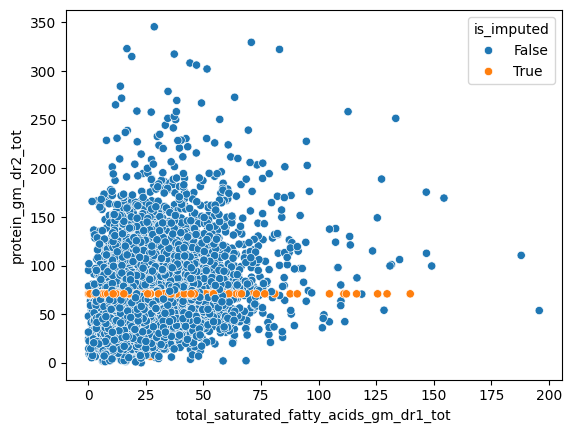

In [ ]:
df_simple.select_columns('general_health_condition','taking_insulin_now', 'weight_kg', 'standing_height_cm', 'blood_cadmium_ugl', 'total_saturated_fatty_acids_gm_dr1_tot', 'diastolic_blood_pres2_nd_rdg_mm_hg', 'protein_gm_dr2_tot', 'energy_kcal_dr2_tot').missing.bind_shadow_matrix(True, False,suffix='_imp').assign(
        general_health_condition=lambda df: df.general_health_condition.fillna(value=df.general_health_condition.mean().round()),
        taking_insulin_now=lambda df: df.taking_insulin_now.fillna(value=df.taking_insulin_now.mean().round()),
        weight_kg=lambda df: df.weight_kg.fillna(value=df.weight_kg.mean().round()),
        standing_height_cm=lambda df: df.standing_height_cm.fillna(value=df.standing_height_cm.mean().round()),
        blood_cadmium_ugl=lambda df: df.blood_cadmium_ugl.fillna(value=df.blood_cadmium_ugl.mean().round()),
        total_saturated_fatty_acids_gm_dr1_tot=lambda df: df.total_saturated_fatty_acids_gm_dr1_tot.fillna(value=df.total_saturated_fatty_acids_gm_dr1_tot.mean().round()),
        diastolic_blood_pres2_nd_rdg_mm_hg=lambda df: df.diastolic_blood_pres2_nd_rdg_mm_hg.fillna(value=df.diastolic_blood_pres2_nd_rdg_mm_hg.mean().round()),
        protein_gm_dr2_tot=lambda df: df.protein_gm_dr2_tot.fillna(value=df.protein_gm_dr2_tot.mean().round()),
        energy_kcal_dr2_tot=lambda df: df.energy_kcal_dr2_tot.fillna(value=df.energy_kcal_dr2_tot.mean().round()),
    ).missing.scatter_imputation_plot(x = 'total_saturated_fatty_acids_gm_dr1_tot', y = 'protein_gm_dr2_tot')
plt.show()

In [ ]:
df_simple = df_simple.select_columns('general_health_condition','taking_insulin_now', 'weight_kg', 'standing_height_cm', 'blood_cadmium_ugl', 'total_saturated_fatty_acids_gm_dr1_tot', 'diastolic_blood_pres2_nd_rdg_mm_hg', 'protein_gm_dr2_tot', 'energy_kcal_dr2_tot').missing.bind_shadow_matrix(True, False).assign(
        general_health_condition=lambda df: df.general_health_condition.fillna(value=df.general_health_condition.mean().round()),
        taking_insulin_now=lambda df: df.taking_insulin_now.fillna(value=df.taking_insulin_now.mean().round()),
        weight_kg=lambda df: df.weight_kg.fillna(value=df.weight_kg.mean().round()),
        standing_height_cm=lambda df: df.standing_height_cm.fillna(value=df.standing_height_cm.mean().round()),
        blood_cadmium_ugl=lambda df: df.blood_cadmium_ugl.fillna(value=df.blood_cadmium_ugl.mean().round()),
        total_saturated_fatty_acids_gm_dr1_tot=lambda df: df.total_saturated_fatty_acids_gm_dr1_tot.fillna(value=df.total_saturated_fatty_acids_gm_dr1_tot.mean().round()),
        diastolic_blood_pres2_nd_rdg_mm_hg=lambda df: df.diastolic_blood_pres2_nd_rdg_mm_hg.fillna(value=df.diastolic_blood_pres2_nd_rdg_mm_hg.mean().round()),
        protein_gm_dr2_tot=lambda df: df.protein_gm_dr2_tot.fillna(value=df.protein_gm_dr2_tot.mean().round()),
        energy_kcal_dr2_tot=lambda df: df.energy_kcal_dr2_tot.fillna(value=df.energy_kcal_dr2_tot.mean().round()),
    )

In [ ]:
df_simple.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,general_health_condition,0,8366,0.0
1,taking_insulin_now,0,8366,0.0
2,weight_kg,0,8366,0.0
3,standing_height_cm,0,8366,0.0
4,blood_cadmium_ugl,0,8366,0.0
5,total_saturated_fatty_acids_gm_dr1_tot,0,8366,0.0
6,diastolic_blood_pres2_nd_rdg_mm_hg,0,8366,0.0
7,protein_gm_dr2_tot,0,8366,0.0
8,energy_kcal_dr2_tot,0,8366,0.0
9,general_health_condition_NA,0,8366,0.0


## **6.3. Vecinos mas cercanos**

In [ ]:
knn_imputer = sklearn.impute.KNNImputer()
nhanes_knn_df = pd.DataFrame(
    knn_imputer.fit_transform(data_mod_transformed).round(),
    columns=data_mod_transformed.columns,
    index=data_mod_transformed.index
)
nhanes_knn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8366 entries, 0 to 8365
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   total_number_of_people_in_the_family    8366 non-null   float64
 1   gender                                  8366 non-null   float64
 2   general_health_condition                8366 non-null   float64
 3   age_in_years_at_screening               8366 non-null   float64
 4   taking_insulin_now                      8366 non-null   float64
 5   weight_kg                               8366 non-null   float64
 6   standing_height_cm                      8366 non-null   float64
 7   blood_cadmium_ugl                       8366 non-null   float64
 8   total_saturated_fatty_acids_gm_dr1_tot  8366 non-null   float64
 9   diastolic_blood_pres2_nd_rdg_mm_hg      8366 non-null   float64
 10  protein_gm_dr2_tot                      8366 non-null   floa

In [ ]:
knn_imputer_shadow_matrix = pd.concat([nhanes_knn_df, data_mod.missing.create_shadow_matrix(True, False, suffix ='_imp', only_missing = True)], axis=1)
knn_imputer_shadow_matrix

,total_number_of_people_in_the_family,gender,general_health_condition,age_in_years_at_screening,taking_insulin_now,weight_kg,standing_height_cm,blood_cadmium_ugl,total_saturated_fatty_acids_gm_dr1_tot,diastolic_blood_pres2_nd_rdg_mm_hg,...,energy_kcal_dr2_tot,taking_insulin_now_imp,weight_kg_imp,standing_height_cm_imp,blood_cadmium_ugl_imp,total_saturated_fatty_acids_gm_dr1_tot_imp,diastolic_blood_pres2_nd_rdg_mm_hg_imp,protein_gm_dr2_tot_imp,energy_kcal_dr2_tot_imp,general_health_condition_imp
0,4.0,0.0,2.0,2.0,0.0,14.0,89.0,0.0,21.0,54.0,...,1275.0,False,False,False,True,True,True,True,True,True
1,3.0,1.0,2.0,2.0,0.0,14.0,94.0,0.0,11.0,54.0,...,1356.0,False,False,False,False,False,True,False,False,True
2,0.0,0.0,2.0,66.0,0.0,80.0,158.0,0.0,16.0,87.0,...,1235.0,False,False,False,False,False,True,False,False,False
3,4.0,1.0,4.0,18.0,0.0,66.0,176.0,0.0,35.0,70.0,...,2081.0,False,False,False,False,False,False,True,True,False
4,6.0,1.0,2.0,13.0,0.0,45.0,158.0,0.0,33.0,46.0,...,1794.0,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,1.0,0.0,4.0,70.0,0.0,49.0,156.0,1.0,8.0,78.0,...,1054.0,False,False,False,False,False,False,False,False,False
8362,0.0,1.0,1.0,42.0,0.0,97.0,165.0,0.0,26.0,76.0,...,1607.0,False,False,False,False,False,False,True,True,False
8363,6.0,0.0,2.0,41.0,0.0,69.0,163.0,0.0,21.0,72.0,...,1835.0,False,False,False,False,False,False,False,False,False
8364,3.0,0.0,4.0,14.0,0.0,112.0,157.0,0.0,23.0,60.0,...,1617.0,False,False,False,False,False,False,False,False,False


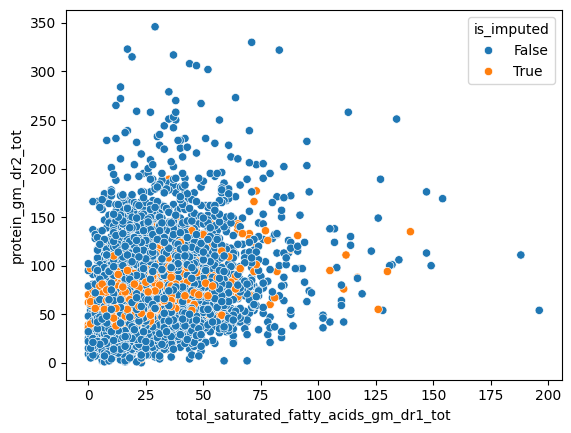

In [ ]:
 knn_imputer_shadow_matrix.missing.scatter_imputation_plot(x = 'total_saturated_fatty_acids_gm_dr1_tot', y = 'protein_gm_dr2_tot')
 plt.show()

## **6.4. MICE - Regresion Lineal**

In [ ]:
mice_imputer = sklearn.impute.IterativeImputer(estimator = LinearRegression(),
                                               initial_strategy = 'mean',
                                               max_iter = 10,
                                               )
nhanes_linear_df = pd.DataFrame(
    mice_imputer.fit_transform(data_mod_transformed).round(),
    columns=data_mod_transformed.columns,
    index=data_mod_transformed.index
)
nhanes_linear_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8366 entries, 0 to 8365
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   total_number_of_people_in_the_family    8366 non-null   float64
 1   gender                                  8366 non-null   float64
 2   general_health_condition                8366 non-null   float64
 3   age_in_years_at_screening               8366 non-null   float64
 4   taking_insulin_now                      8366 non-null   float64
 5   weight_kg                               8366 non-null   float64
 6   standing_height_cm                      8366 non-null   float64
 7   blood_cadmium_ugl                       8366 non-null   float64
 8   total_saturated_fatty_acids_gm_dr1_tot  8366 non-null   float64
 9   diastolic_blood_pres2_nd_rdg_mm_hg      8366 non-null   float64
 10  protein_gm_dr2_tot                      8366 non-null   floa

In [ ]:
mice_linear_shadow_matrix = pd.concat([nhanes_linear_df,data_mod.missing.create_shadow_matrix(True, False, suffix ='_imp', only_missing = True)], axis=1)
mice_linear_shadow_matrix

,total_number_of_people_in_the_family,gender,general_health_condition,age_in_years_at_screening,taking_insulin_now,weight_kg,standing_height_cm,blood_cadmium_ugl,total_saturated_fatty_acids_gm_dr1_tot,diastolic_blood_pres2_nd_rdg_mm_hg,...,energy_kcal_dr2_tot,taking_insulin_now_imp,weight_kg_imp,standing_height_cm_imp,blood_cadmium_ugl_imp,total_saturated_fatty_acids_gm_dr1_tot_imp,diastolic_blood_pres2_nd_rdg_mm_hg_imp,protein_gm_dr2_tot_imp,energy_kcal_dr2_tot_imp,general_health_condition_imp
0,4.0,0.0,2.0,2.0,0.0,14.0,89.0,0.0,15.0,43.0,...,1067.0,False,False,False,True,True,True,True,True,True
1,3.0,1.0,2.0,2.0,0.0,14.0,94.0,0.0,11.0,43.0,...,1356.0,False,False,False,False,False,True,False,False,True
2,0.0,0.0,2.0,66.0,0.0,80.0,158.0,0.0,16.0,72.0,...,1235.0,False,False,False,False,False,True,False,False,False
3,4.0,1.0,4.0,18.0,0.0,66.0,176.0,0.0,35.0,70.0,...,2246.0,False,False,False,False,False,False,True,True,False
4,6.0,1.0,2.0,13.0,0.0,45.0,158.0,0.0,33.0,46.0,...,1794.0,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,1.0,0.0,4.0,70.0,0.0,49.0,156.0,1.0,8.0,78.0,...,1054.0,False,False,False,False,False,False,False,False,False
8362,0.0,1.0,1.0,42.0,0.0,97.0,165.0,0.0,26.0,76.0,...,2043.0,False,False,False,False,False,False,True,True,False
8363,6.0,0.0,2.0,41.0,0.0,69.0,163.0,0.0,21.0,72.0,...,1835.0,False,False,False,False,False,False,False,False,False
8364,3.0,0.0,4.0,14.0,0.0,112.0,157.0,0.0,23.0,60.0,...,1617.0,False,False,False,False,False,False,False,False,False


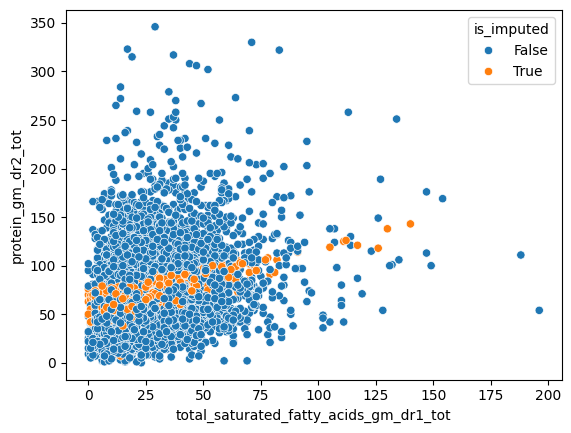

In [ ]:
mice_linear_shadow_matrix.missing.scatter_imputation_plot(x = 'total_saturated_fatty_acids_gm_dr1_tot', y = 'protein_gm_dr2_tot')
plt.show()

## **6.5. MICE - Arbol de Decision**

In [ ]:
mice_imputer = sklearn.impute.IterativeImputer(estimator = DecisionTreeRegressor(),
                                               initial_strategy = 'mean',
                                               max_iter = 10,
                                               )
nhanes_tree_df = pd.DataFrame(
    mice_imputer.fit_transform(data_mod_transformed).round(),
    columns=data_mod_transformed.columns,
    index=data_mod_transformed.index
)
nhanes_tree_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8366 entries, 0 to 8365
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   total_number_of_people_in_the_family    8366 non-null   float64
 1   gender                                  8366 non-null   float64
 2   general_health_condition                8366 non-null   float64
 3   age_in_years_at_screening               8366 non-null   float64
 4   taking_insulin_now                      8366 non-null   float64
 5   weight_kg                               8366 non-null   float64
 6   standing_height_cm                      8366 non-null   float64
 7   blood_cadmium_ugl                       8366 non-null   float64
 8   total_saturated_fatty_acids_gm_dr1_tot  8366 non-null   float64
 9   diastolic_blood_pres2_nd_rdg_mm_hg      8366 non-null   float64
 10  protein_gm_dr2_tot                      8366 non-null   floa

In [ ]:
mice_tree_shadow_matrix = pd.concat([nhanes_tree_df, data_mod.missing.create_shadow_matrix(True, False, suffix ='_imp', only_missing = True)], axis=1)
mice_tree_shadow_matrix

,total_number_of_people_in_the_family,gender,general_health_condition,age_in_years_at_screening,taking_insulin_now,weight_kg,standing_height_cm,blood_cadmium_ugl,total_saturated_fatty_acids_gm_dr1_tot,diastolic_blood_pres2_nd_rdg_mm_hg,...,energy_kcal_dr2_tot,taking_insulin_now_imp,weight_kg_imp,standing_height_cm_imp,blood_cadmium_ugl_imp,total_saturated_fatty_acids_gm_dr1_tot_imp,diastolic_blood_pres2_nd_rdg_mm_hg_imp,protein_gm_dr2_tot_imp,energy_kcal_dr2_tot_imp,general_health_condition_imp
0,4.0,0.0,2.0,2.0,0.0,14.0,89.0,0.0,21.0,6.0,...,1270.0,False,False,False,True,True,True,True,True,True
1,3.0,1.0,4.0,2.0,0.0,14.0,94.0,0.0,11.0,6.0,...,1356.0,False,False,False,False,False,True,False,False,True
2,0.0,0.0,2.0,66.0,0.0,80.0,158.0,0.0,16.0,60.0,...,1235.0,False,False,False,False,False,True,False,False,False
3,4.0,1.0,4.0,18.0,0.0,66.0,176.0,0.0,35.0,70.0,...,3087.0,False,False,False,False,False,False,True,True,False
4,6.0,1.0,2.0,13.0,0.0,45.0,158.0,0.0,33.0,46.0,...,1794.0,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,1.0,0.0,4.0,70.0,0.0,49.0,156.0,1.0,8.0,78.0,...,1054.0,False,False,False,False,False,False,False,False,False
8362,0.0,1.0,1.0,42.0,0.0,97.0,165.0,0.0,26.0,76.0,...,1716.0,False,False,False,False,False,False,True,True,False
8363,6.0,0.0,2.0,41.0,0.0,69.0,163.0,0.0,21.0,72.0,...,1835.0,False,False,False,False,False,False,False,False,False
8364,3.0,0.0,4.0,14.0,0.0,112.0,157.0,0.0,23.0,60.0,...,1617.0,False,False,False,False,False,False,False,False,False


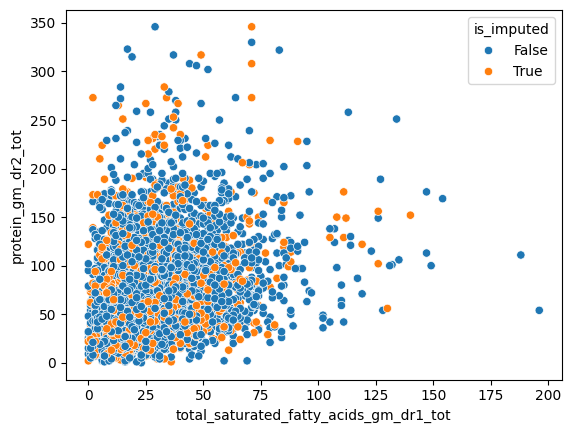

In [ ]:
mice_tree_shadow_matrix.missing.scatter_imputation_plot(x = 'total_saturated_fatty_acids_gm_dr1_tot', y = 'protein_gm_dr2_tot')
plt.show()

## **6.6. MICE - Bosque aleatorio**

In [ ]:
mice_imputer = sklearn.impute.IterativeImputer(estimator = RandomForestRegressor(),
                                               initial_strategy = 'mean',
                                               max_iter = 1,
                                               )
nhanes_forest_df = pd.DataFrame(
    mice_imputer.fit_transform(data_mod_transformed).round(),
    columns=data_mod_transformed.columns,
    index=data_mod_transformed.index
)
nhanes_forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8366 entries, 0 to 8365
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   total_number_of_people_in_the_family    8366 non-null   float64
 1   gender                                  8366 non-null   float64
 2   general_health_condition                8366 non-null   float64
 3   age_in_years_at_screening               8366 non-null   float64
 4   taking_insulin_now                      8366 non-null   float64
 5   weight_kg                               8366 non-null   float64
 6   standing_height_cm                      8366 non-null   float64
 7   blood_cadmium_ugl                       8366 non-null   float64
 8   total_saturated_fatty_acids_gm_dr1_tot  8366 non-null   float64
 9   diastolic_blood_pres2_nd_rdg_mm_hg      8366 non-null   float64
 10  protein_gm_dr2_tot                      8366 non-null   floa

In [ ]:
mice_forest_shadow_matrix = pd.concat([nhanes_forest_df,data_mod.missing.create_shadow_matrix(True, False, suffix ='_imp', only_missing = True)], axis=1)
mice_forest_shadow_matrix

,total_number_of_people_in_the_family,gender,general_health_condition,age_in_years_at_screening,taking_insulin_now,weight_kg,standing_height_cm,blood_cadmium_ugl,total_saturated_fatty_acids_gm_dr1_tot,diastolic_blood_pres2_nd_rdg_mm_hg,...,energy_kcal_dr2_tot,taking_insulin_now_imp,weight_kg_imp,standing_height_cm_imp,blood_cadmium_ugl_imp,total_saturated_fatty_acids_gm_dr1_tot_imp,diastolic_blood_pres2_nd_rdg_mm_hg_imp,protein_gm_dr2_tot_imp,energy_kcal_dr2_tot_imp,general_health_condition_imp
0,4.0,0.0,2.0,2.0,0.0,14.0,89.0,0.0,19.0,26.0,...,1750.0,False,False,False,True,True,True,True,True,True
1,3.0,1.0,2.0,2.0,0.0,14.0,94.0,0.0,11.0,28.0,...,1356.0,False,False,False,False,False,True,False,False,True
2,0.0,0.0,2.0,66.0,0.0,80.0,158.0,0.0,16.0,72.0,...,1235.0,False,False,False,False,False,True,False,False,False
3,4.0,1.0,4.0,18.0,0.0,66.0,176.0,0.0,35.0,70.0,...,1981.0,False,False,False,False,False,False,True,True,False
4,6.0,1.0,2.0,13.0,0.0,45.0,158.0,0.0,33.0,46.0,...,1794.0,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,1.0,0.0,4.0,70.0,0.0,49.0,156.0,1.0,8.0,78.0,...,1054.0,False,False,False,False,False,False,False,False,False
8362,0.0,1.0,1.0,42.0,0.0,97.0,165.0,0.0,26.0,76.0,...,1877.0,False,False,False,False,False,False,True,True,False
8363,6.0,0.0,2.0,41.0,0.0,69.0,163.0,0.0,21.0,72.0,...,1835.0,False,False,False,False,False,False,False,False,False
8364,3.0,0.0,4.0,14.0,0.0,112.0,157.0,0.0,23.0,60.0,...,1617.0,False,False,False,False,False,False,False,False,False


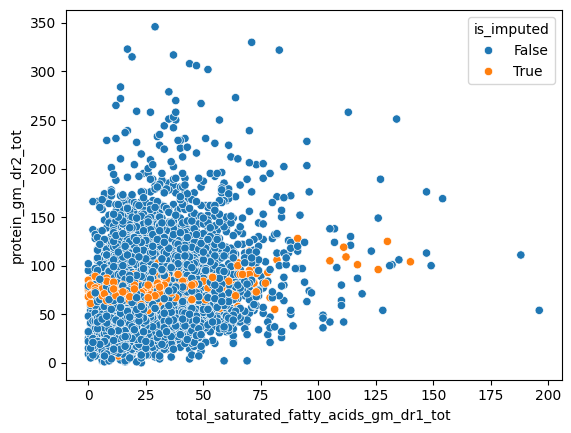

In [ ]:
mice_forest_shadow_matrix.missing.scatter_imputation_plot(x = 'total_saturated_fatty_acids_gm_dr1_tot', y = 'protein_gm_dr2_tot')
plt.show()

## **6.7. MICE - Red Neuronal Perceptron**

In [ ]:
mice_imputer = sklearn.impute.IterativeImputer(estimator = MLPRegressor(),
                                               initial_strategy = 'mean',
                                               max_iter = 2,
                                               )
nhanes_neural_df = pd.DataFrame(
    mice_imputer.fit_transform(data_mod_transformed).round(),
    columns=data_mod_transformed.columns,
    index=data_mod_transformed.index
)
nhanes_neural_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8366 entries, 0 to 8365
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   total_number_of_people_in_the_family    8366 non-null   float64
 1   gender                                  8366 non-null   float64
 2   general_health_condition                8366 non-null   float64
 3   age_in_years_at_screening               8366 non-null   float64
 4   taking_insulin_now                      8366 non-null   float64
 5   weight_kg                               8366 non-null   float64
 6   standing_height_cm                      8366 non-null   float64
 7   blood_cadmium_ugl                       8366 non-null   float64
 8   total_saturated_fatty_acids_gm_dr1_tot  8366 non-null   float64
 9   diastolic_blood_pres2_nd_rdg_mm_hg      8366 non-null   float64
 10  protein_gm_dr2_tot                      8366 non-null   floa

In [ ]:
mice_neural_shadow_matrix = pd.concat([nhanes_neural_df,data_mod.missing.create_shadow_matrix(True, False, suffix ='_imp', only_missing = True)], axis=1)
mice_neural_shadow_matrix

,total_number_of_people_in_the_family,gender,general_health_condition,age_in_years_at_screening,taking_insulin_now,weight_kg,standing_height_cm,blood_cadmium_ugl,total_saturated_fatty_acids_gm_dr1_tot,diastolic_blood_pres2_nd_rdg_mm_hg,...,energy_kcal_dr2_tot,taking_insulin_now_imp,weight_kg_imp,standing_height_cm_imp,blood_cadmium_ugl_imp,total_saturated_fatty_acids_gm_dr1_tot_imp,diastolic_blood_pres2_nd_rdg_mm_hg_imp,protein_gm_dr2_tot_imp,energy_kcal_dr2_tot_imp,general_health_condition_imp
0,4.0,0.0,2.0,2.0,0.0,14.0,89.0,0.0,19.0,32.0,...,1481.0,False,False,False,True,True,True,True,True,True
1,3.0,1.0,2.0,2.0,0.0,14.0,94.0,0.0,11.0,33.0,...,1356.0,False,False,False,False,False,True,False,False,True
2,0.0,0.0,2.0,66.0,0.0,80.0,158.0,0.0,16.0,69.0,...,1235.0,False,False,False,False,False,True,False,False,False
3,4.0,1.0,4.0,18.0,0.0,66.0,176.0,0.0,35.0,70.0,...,2290.0,False,False,False,False,False,False,True,True,False
4,6.0,1.0,2.0,13.0,0.0,45.0,158.0,0.0,33.0,46.0,...,1794.0,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,1.0,0.0,4.0,70.0,0.0,49.0,156.0,1.0,8.0,78.0,...,1054.0,False,False,False,False,False,False,False,False,False
8362,0.0,1.0,1.0,42.0,0.0,97.0,165.0,0.0,26.0,76.0,...,2070.0,False,False,False,False,False,False,True,True,False
8363,6.0,0.0,2.0,41.0,0.0,69.0,163.0,0.0,21.0,72.0,...,1835.0,False,False,False,False,False,False,False,False,False
8364,3.0,0.0,4.0,14.0,0.0,112.0,157.0,0.0,23.0,60.0,...,1617.0,False,False,False,False,False,False,False,False,False


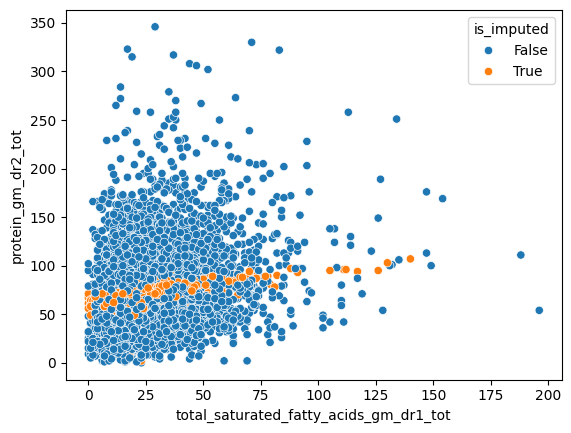

In [ ]:
mice_neural_shadow_matrix.missing.scatter_imputation_plot(x = 'total_saturated_fatty_acids_gm_dr1_tot', y = 'protein_gm_dr2_tot')
plt.show()

# **7. Analisis de resultados**

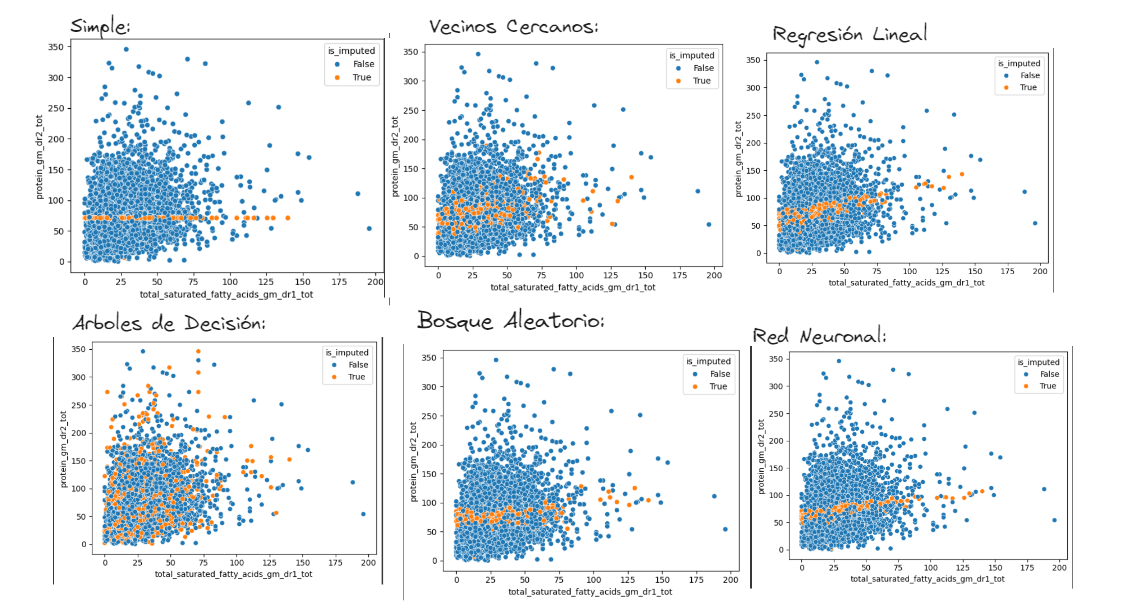

## **En base a las correlaciones moderadas y fuertes entre las variables, el modelo de imputación preferible es aquel en el que los datos imputados se distribuyen de manera más coherente con los datos no imputados y mantienen patrones similares a los datos originales. En este caso, el modelo de regresión lineal podría ser considerado la mejor opción.**